In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# 引用元
# http://dragstar.hatenablog.com/entry/2016/07/24/150534

# CSVへ変換する過程

# データセットを呼び出し
from sklearn import datasets

iris = datasets.load_iris()

# データフレームを作成,同時に列名を変更。
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = pd.DataFrame(iris.data, columns={
#     'Id',
#     'sepal length (cm)':'SepalLengthCm',
#     'sepal width (cm)':'SepalWidthCm',
#     'petal length (cm)':'PetalLengthCm',
#     'petal width (cm)':'PetalWidthCm',
#     'target':'Species'
    
    'SepalLengthCm',
    'SepalWidthCm',
    'PetalLengthCm',
    'PetalWidthCm',
})

# df['target'] = iris.target_names[iris.target]
df['Species'] = iris.target_names[iris.target]
# df['Id'] = iris.target_names[iris.id]


# /////// change names in columns start////////
# DataFrameのカラム名を変更する
# https://shirabeta.net/How-to-rename-columns-of-pandas-DataFrame.html#.XkZWHUORXOQ
# dic = {
#     'Unnamed: 0':'Id',
#     'sepal length (cm)':'がく片の長さ (cm)',
#     'sepal width (cm)':'がく片の幅 (cm)',
#     'petal length (cm)':'花びらの長さ (cm)',
#     'petal width (cm)':'花びらの幅 (cm)',
#     'target':'分類'
# }
# df.rename(columns=dic)
# df.head()

# https://note.nkmk.me/python-pandas-dataframe-rename/
# # 元データの'Unnamed: 0'を'ID'に変更
# df_new = df.rename(index={'Unnamed: 0': 'ID'})

# データ読み込み後に列名を変更する
# df = df.rename(columns={
#     'Unnamed: 0':'Id',
#     'sepal length (cm)':'SepalLengthCm',
#     'sepal width (cm)':'SepalWidthCm',
#     'petal length (cm)':'PetalLengthCm',
#     'petal width (cm)':'PetalWidthCm',
#     'target':'Species'
# })

# /////// change names in columns end//////////

# CSV ファイル (employee.csv) として出力
df.to_csv("Iris_ML.csv")

In [83]:
# iris = pd.read_csv("Iris.csv")
iris = pd.read_csv("Iris_ML.csv")
# iris = pd.read_csv("Iris_ML.csv",
#                    names = ('Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'))

In [84]:
iris.head()

,Unnamed: 0,PetalLengthCm,SepalWidthCm,PetalWidthCm,SepalLengthCm,Species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [85]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Unnamed: 0       150 non-null int64
PetalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalWidthCm     150 non-null float64
SepalLengthCm    150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


removing unneeded column

In [86]:
# iris.drop("Id", axis=1, inplace = True)
iris.drop("Unnamed: 0", axis=1, inplace = True)

## Some EDA with Iris

In [91]:
fig = iris[iris.Species == 'Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

ValueError: scatter requires x column to be numeric

In [16]:
sns.FaceGrid(iris, hue='Species', height=5) \
    .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
    .add_legend()

AttributeError: module 'seaborn' has no attribute 'FaceGrid'

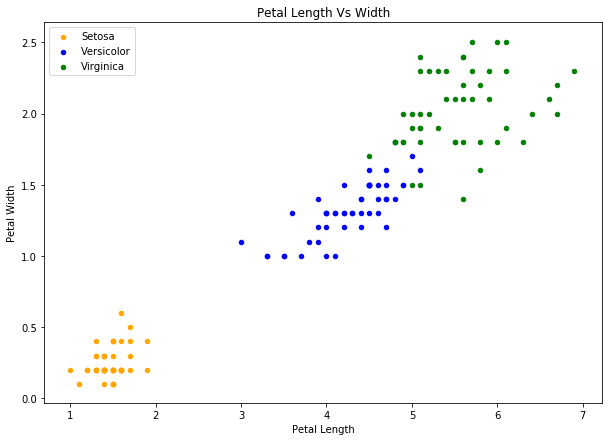

In [17]:
fig = iris[iris.Species == 'Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

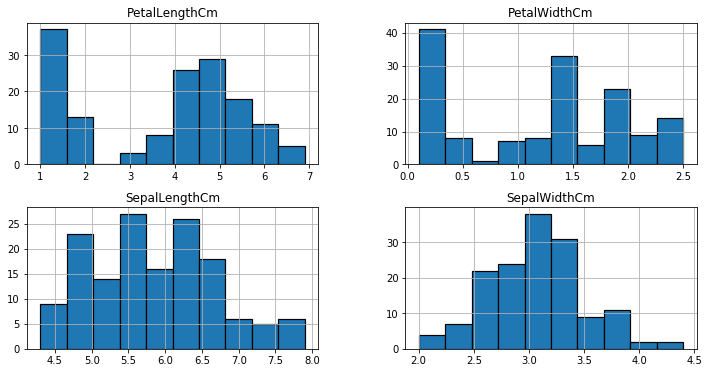

In [19]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

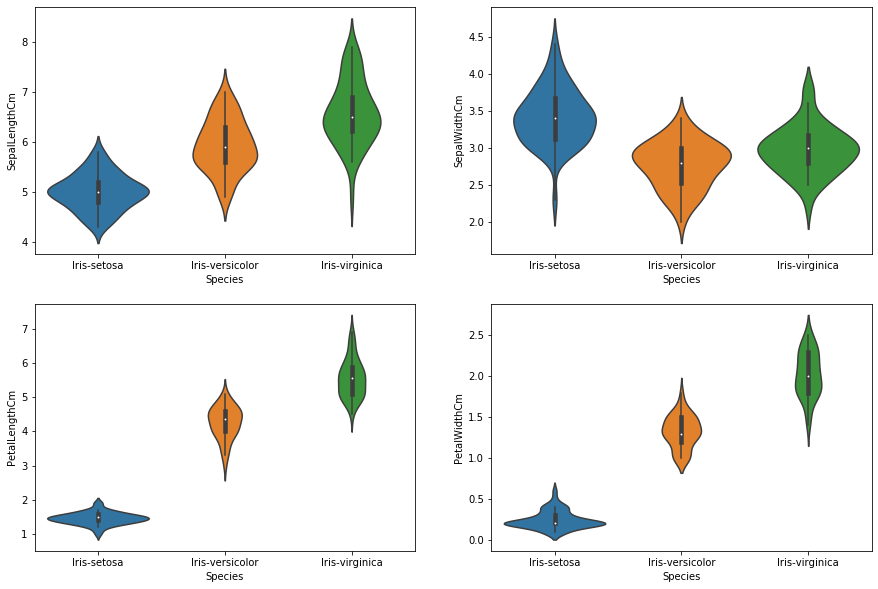

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='PetalWidthCm', data=iris)

Now the given problem is a classification problem.. Thus we will be using the classificatoin algorithms to build a model.

Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

Attributes--> An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and witdh. It is also known as  Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [21]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for support vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA


In [22]:
iris.shape

(150, 5)

When we train any algorithm, the number of features and their correlation works for an important role. If we have many of them with highly correlated, the entire training performance of an algorithm will reduce accuracy. Thus feature selection needs to be done carefully. This dataset has fewer features, but still, we can see the correlation.

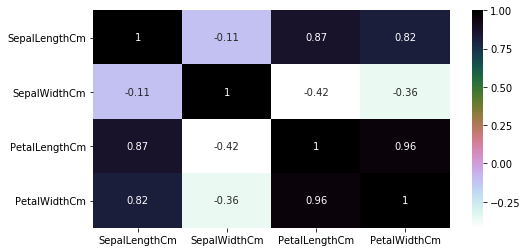

In [26]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()
plt.show()

Observation ---> The Sepal Width and Length are not correlated, and the Petal Width and Length are highly correlated. We will use all the features for training the algorithm and check accuracy.

Then we will use Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features not correlated. Thus we can have a variation in the dataset for better accuracy. 

Steps To Follow When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training it as it helps to train the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. Then, we check the accuracy by passing the predicted outcome and the actual output to the model.

## Splitting The Data into Training and Testing Dataset

In [27]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [29]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [30]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
3,4.6,3.1,1.5,0.2
81,5.5,2.4,3.7,1.0
79,5.7,2.6,3.5,1.0
67,5.8,2.7,4.1,1.0
5,5.4,3.9,1.7,0.4


In [31]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
20,5.4,3.4,1.7,0.2
75,6.6,3.0,4.4,1.4
90,5.5,2.6,4.4,1.2
106,4.9,2.5,4.5,1.7
39,5.1,3.4,1.5,0.2


In [32]:
train_y.head()

3         Iris-setosa
81    Iris-versicolor
79    Iris-versicolor
67    Iris-versicolor
5         Iris-setosa
Name: Species, dtype: object

## Support Vector Machine SVM

In [33]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ',
     metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
# we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.8666666666666667


(original text)
SVM is giving very good accuracy. We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

## Logistic Regression

In [34]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ',
     metrics.accuracy_score(prediction,test_y))

The accuracy of Logistic Regression is:  0.9111111111111111


## Decision Tree

In [35]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
predicition = model.predict(test_X)
print('The accuracy of Decision Tree is: ',
     metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9111111111111111


## K-Nearest Neighbors

In [36]:
model = KNeighborsClassifier(n_neighbors=3) # this exmanines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ',
     metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9333333333333333


## Let's check the accuracy for various values of n for K-Nearest neighbors

([<matplotlib.axis.XTick at 0x126cdd4d0>,
 <a list of 10 Text xticklabel objects>)

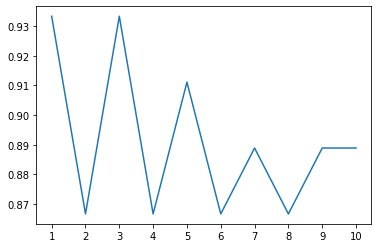

In [43]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

Above is the graph showing the accuracy for the KNN models using different values of n.


## We used all the features of iris in above models. Now we will use Peatals and Sepals seperately

## Creating Petals and Sepals Training Data

In [45]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm', 'SepalWidthCm', 'Species']]

## For Iris Petal

In [47]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) # petals
train_x_p = train_p[['PetalWidthCm', 'PetalLengthCm']]
train_y_p = train_p.Species


test_x_p = test_p[['PetalWidthCm', 'PetalLengthCm']]
test_y_p = test_p.Species

## For Iris Sepal

In [53]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

# SVM Algorithm

In [55]:
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction,test_y_s))



The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


# Logistic Regression

In [56]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petal is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petal is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepal is: 0.8222222222222222


# Decision Tree

In [57]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the ecision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the ecision Tree using Sepals is: 0.6666666666666666


# K-Nearest Neighbors

In [60]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


### Observations:

- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.